In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [4]:
df.duplicated().sum()

1103

In [5]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [14]:
for column in df: # missing values
    print( "column name:", column, "- misisng values ",df[column].isnull().sum())
    print("------------------------------------------------------------------")

column name: Make - misisng values  0
------------------------------------------------------------------
column name: Model - misisng values  0
------------------------------------------------------------------
column name: Vehicle Class - misisng values  0
------------------------------------------------------------------
column name: Engine Size(L) - misisng values  0
------------------------------------------------------------------
column name: Cylinders - misisng values  0
------------------------------------------------------------------
column name: Transmission - misisng values  0
------------------------------------------------------------------
column name: Fuel Type - misisng values  0
------------------------------------------------------------------
column name: Fuel Consumption City (L/100 km) - misisng values  0
------------------------------------------------------------------
column name: Fuel Consumption Hwy (L/100 km) - misisng values  0
-----------------------------

In [15]:
for column in df:
    print(f"Column"," ",column,"  uniquevalue are :", df[column].nunique())
    print(df[column].unique())
    print("-------------------------")

Column   Make   uniquevalue are : 42
['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']
-------------------------
Column   Model   uniquevalue are : 2053
['ILX' 'ILX HYBRID' 'MDX 4WD' ... 'Tacoma 4WD D-Cab TRD Off-Road/Pro'
 'Atlas Cross Sport 4MOTION' 'XC40 T4 AWD']
-------------------------
Column   Vehicle Class   uniquevalue are : 16
['COMPACT' 'SUV - SMALL' 'MID-SIZE' 'TWO-SEATER' 'MINICOMPACT'
 'SUBCOMPACT' 'FULL-SIZE' 'STATION WAGON - SMALL' 'SUV - STANDARD'
 'VAN - CARGO' 'VAN - PASSENGER' 'PICKUP TRUCK - STANDARD' 'MINIVAN'
 'SPECIAL PURPOSE VEHICLE' 'STATION WAGON - MID-SIZE'
 'PICKUP TRUCK - SMALL']
-------------------------


In [16]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


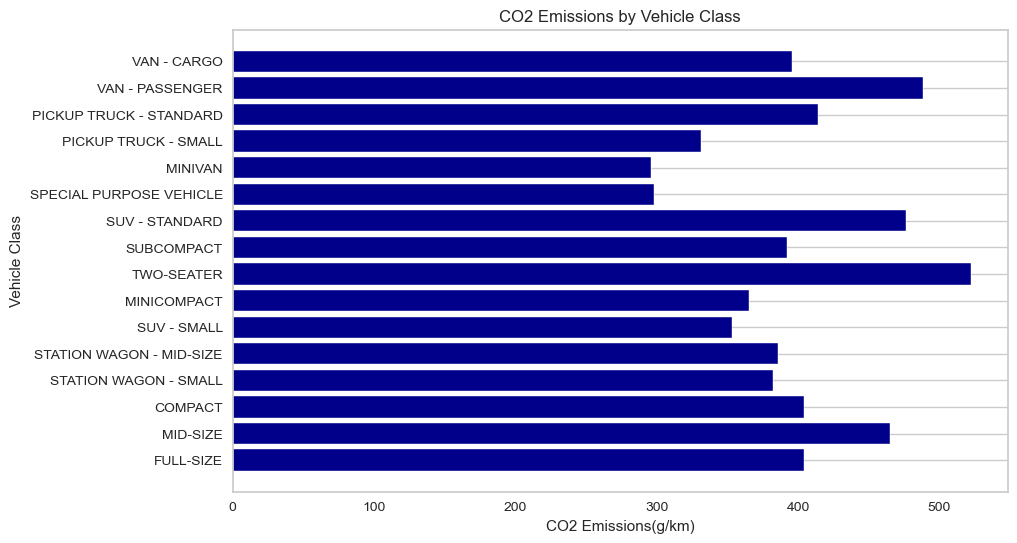

In [77]:
# Sort the DataFrame by CO2 emissions
df.sort_values(by='CO2 Emissions(g/km)', inplace=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['Vehicle Class'], df['CO2 Emissions(g/km)'], color='darkblue')
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('Vehicle Class')
plt.title('CO2 Emissions by Vehicle Class')
plt.grid(axis='x') 
plt.show()

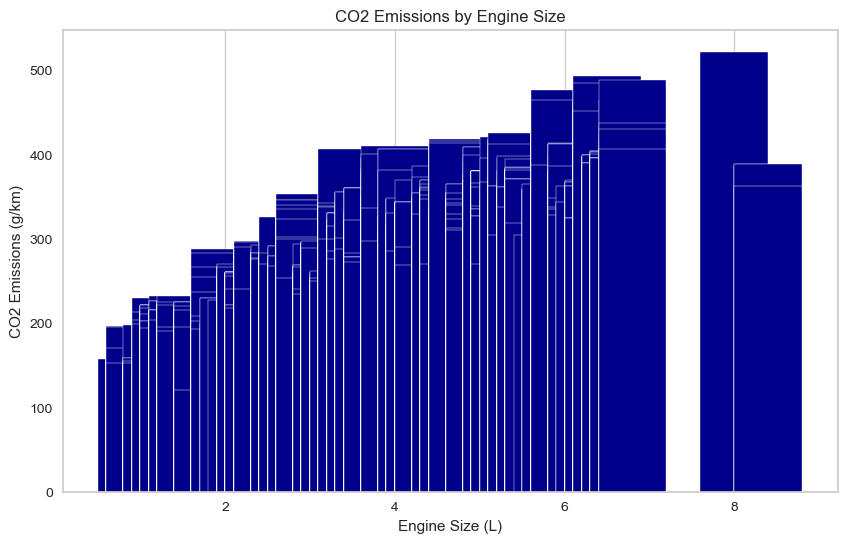

In [76]:
# Sort the DataFrame by Engine Size
df.sort_values(by='Engine Size(L)', inplace=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Engine Size(L)'], df['CO2 Emissions(g/km)'], color='darkblue')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('CO2 Emissions by Engine Size')
plt.grid(axis='y') 
plt.show()

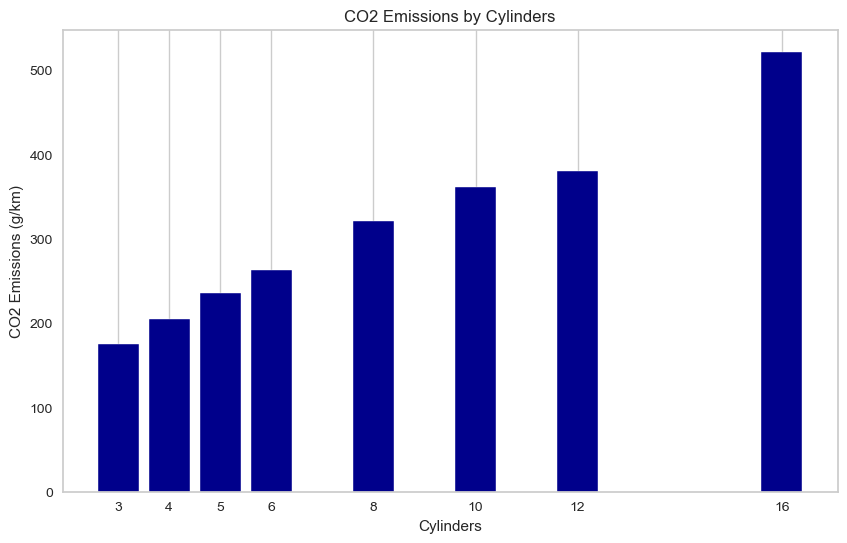

In [78]:
# Grouping by Cylinders and calculating mean CO2 emissions
grouped_df = df.groupby('Cylinders')['CO2 Emissions(g/km)'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Cylinders'], grouped_df['CO2 Emissions(g/km)'], color='darkblue')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('CO2 Emissions by Cylinders')
plt.grid(axis='y')  # Show gridlines only on y-axis
plt.xticks(grouped_df['Cylinders'])
plt.show()

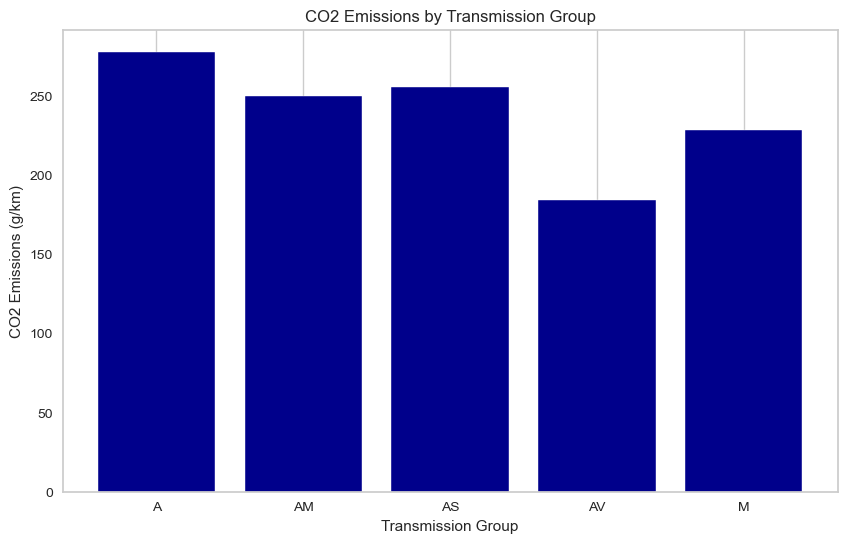

In [79]:
def map_transmission(transmission):
    if transmission.startswith('AM'):
        return 'AM'
    elif transmission.startswith('AS'):
        return 'AS'
    elif transmission.startswith('AV'):
        return 'AV'
    elif transmission.startswith('A'):
        return 'A'
    elif transmission.startswith('M'):
        return 'M'

# Apply the mapping function to create a new column 'Transmission Group'
df['Transmission Group'] = df['Transmission'].apply(map_transmission)

# Grouping by Transmission Group and calculating mean CO2 emissions
grouped_df = df.groupby('Transmission Group')['CO2 Emissions(g/km)'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_df['Transmission Group'], grouped_df['CO2 Emissions(g/km)'], color='darkblue')
plt.xlabel('Transmission Group')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('CO2 Emissions by Transmission Group')
plt.grid(axis='y')
plt.show()

Fuel type X = regular gasoline Z = premium gasoline D = diesel E = ethanol (E85) N = natural gas

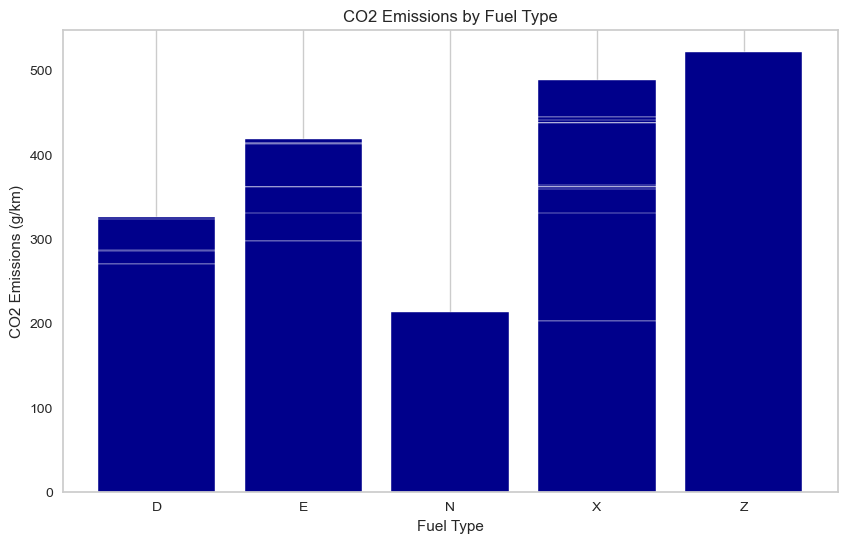

In [80]:
# Sort the DataFrame by Fuel Type
df.sort_values(by='Fuel Type', inplace=True)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Fuel Type'], df['CO2 Emissions(g/km)'], color='darkblue')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.title('CO2 Emissions by Fuel Type')
plt.grid(axis='y') 
plt.show()

Fuel type:	X = regular gasoline
	Z = premium gasoline
	D = diesel
	E = ethanol (E85)
	N = natural gas

Regression Model Preparation
Assumptions of linear regression

Linearity: The relationship between variables is linear. 
Independence: Observations are independent of each other.
Homoscedasticity: Residuals have constant variance. 
Normality of Residuals: Residuals are normally distributed. 
No Perfect Multicollinearity: No perfect relationship among predictors. 
No Autocorrelation: Residuals are not correlated with each other. 
Additivity: Effects of predictors on the response are additive.
Zero Mean Residuals: Mean of residuals is zero.

In [82]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


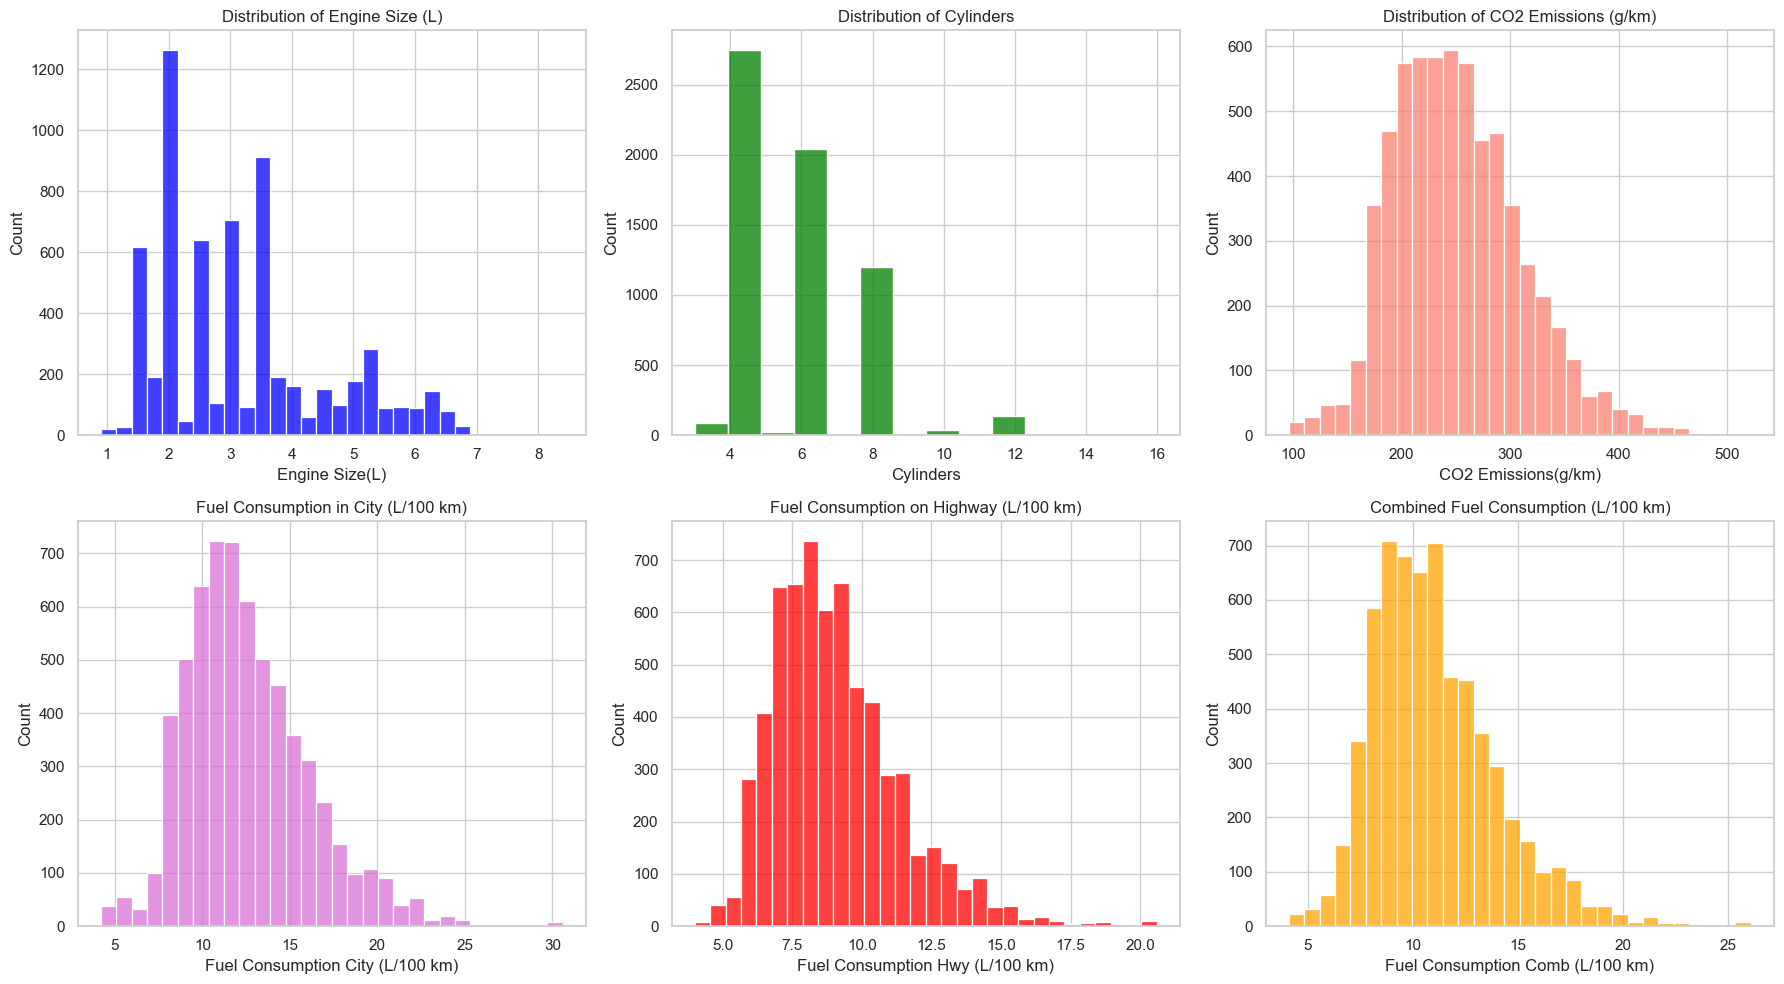

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating subplots for various distributions
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Engine Size Distribution
sns.histplot(df['Engine Size(L)'], bins=30, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Engine Size (L)')

# Cylinders Distribution
sns.histplot(df['Cylinders'], bins=14, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Cylinders')

# CO2 Emissions Distribution
sns.histplot(df['CO2 Emissions(g/km)'], bins=30, ax=axes[0, 2], color='salmon')
axes[0, 2].set_title('Distribution of CO2 Emissions (g/km)')

# Fuel Consumption City Distribution
sns.histplot(df['Fuel Consumption City (L/100 km)'], bins=30, ax=axes[1, 0], color='orchid')
axes[1, 0].set_title('Fuel Consumption in City (L/100 km)')

# Fuel Consumption Highway Distribution
sns.histplot(df['Fuel Consumption Hwy (L/100 km)'], bins=30, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Fuel Consumption on Highway (L/100 km)')

# Fuel Consumption Combined Distribution
sns.histplot(df['Fuel Consumption Comb (L/100 km)'], bins=30, ax=axes[1, 2], color='orange')
axes[1, 2].set_title('Combined Fuel Consumption (L/100 km)')

plt.tight_layout()
plt.show()

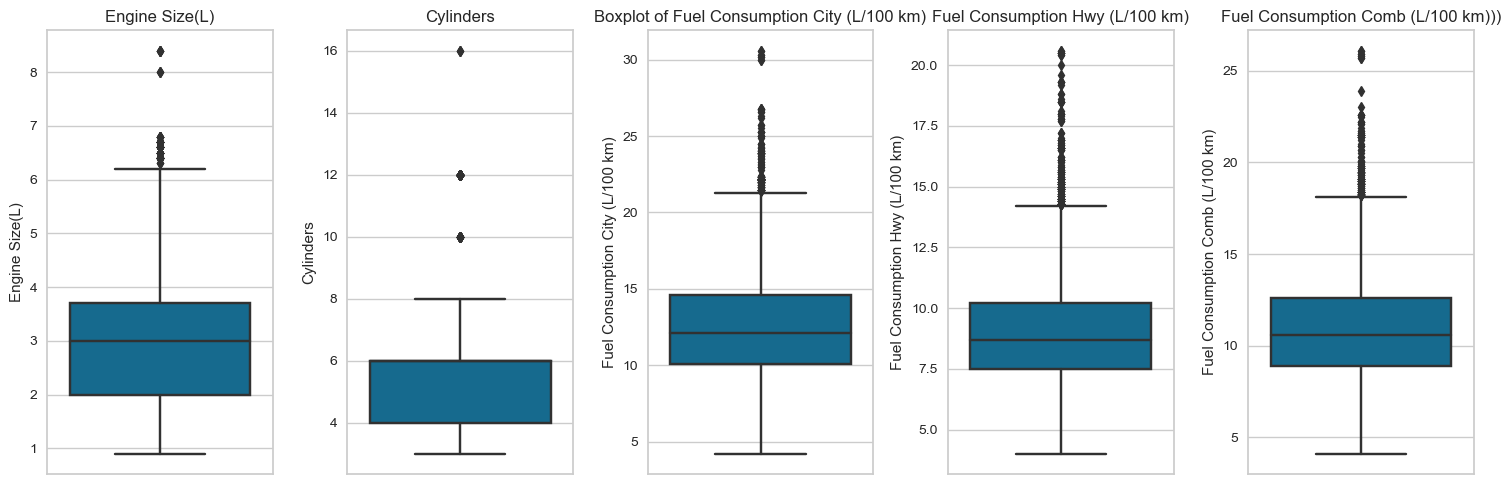

In [85]:
 #Function to create box plots for each column

plt.figure(figsize=(15, 5))

plt.subplot(1, 5, 1)
sns.boxplot(y=df['Engine Size(L)'])
plt.title('Engine Size(L)')

plt.subplot(1, 5, 2)
sns.boxplot(y=df['Cylinders'])
plt.title('Cylinders')

plt.subplot(1, 5, 3)
sns.boxplot(y=df['Fuel Consumption City (L/100 km)'])
plt.title('Boxplot of Fuel Consumption City (L/100 km)')

plt.subplot(1,5,4)
sns.boxplot(y=df['Fuel Consumption Hwy (L/100 km)'])
plt.title('Fuel Consumption Hwy (L/100 km)')

plt.subplot(1, 5, 5)
sns.boxplot(y=df['Fuel Consumption Comb (L/100 km)'])
plt.title('Fuel Consumption Comb (L/100 km)))')


plt.tight_layout()
plt.show()

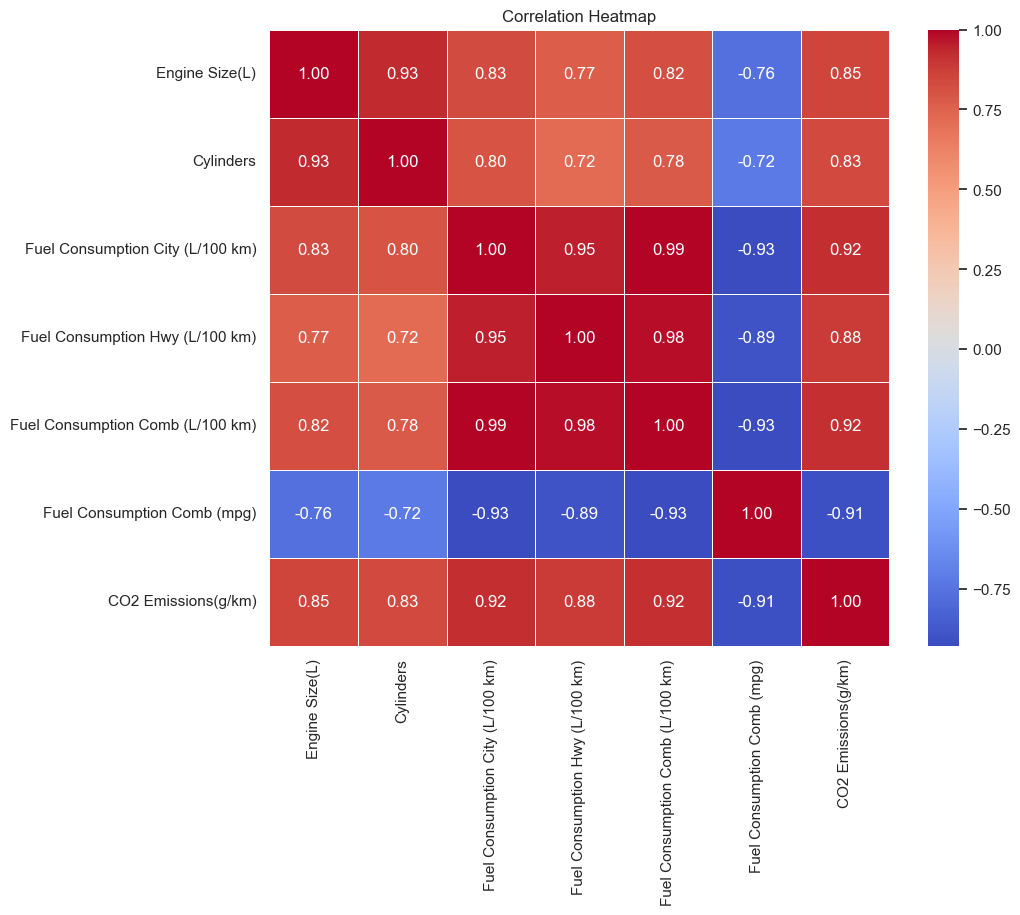

In [30]:
# Select only numerical columns (float and int)
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

As we Seen All Independent Variables are Correlated with our Dependent Variable CO2 Emissions(g/km)

Positive Correlated: Engine Size(L), Cylinders, Fule Consumption City(L/100km), Fule Consumption Hwy(L/100km)
Negative Correlated: Fule Consumption Comb(L/100km)

I'll create two models to predict CO2 emissions:

1- Using All Features

Include all features in your dataset, including categorical ones like 'Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type', and numerical ones like 'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', and 'Fuel Consumption Hwy (L/100 km)'.

2- Using Most Correlated Features 

Engine Size(L), Cylinders, Fule Consumption City(L/100km), Fule Consumption Hwy(L/100km)

I'm excluding the 'Fuel Consumption Comb (L/100 km)' feature because it represents a combined rating of 55% city and 45% highway fuel consumption, presented in liters per 100 kilometers. It's not a direct combination of both features. Additionally, 'Fuel Consumption Comb (mpg)' is essentially the same as 'Fuel Consumption Comb (mpg)', with only a change in units.



Model 1: Uses all features from the original dataset. I'll work on a copy of the original dataset named 'df2', preserving the integrity of the original data.

In [6]:
# Copy df to df2
df2 = df.copy()
df2.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical columns to be one-hot encoded
cat_columns = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']

# Initialize our OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the selected categorical columns
encoded = encoder.fit_transform(df2[cat_columns])

# Create a DataFrame from the encoded values with appropriate column names
one_hot_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_columns))

# Reset index in the original DataFrame and inplace to modify our df
df2.reset_index(drop=True, inplace=True)

# Concatenate the one-hot encoded columns with the original DataFrame
df_encoded = pd.concat([df2, one_hot_encoded], axis=1)
df_encoded

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6277,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6278,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6279,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6280,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
# Define our X
X = df_encoded.drop(['CO2 Emissions(g/km)'], axis=1) # Drop the predicted columns
X = df_encoded.drop(cat_columns, axis=1) # Drop the original categorical columns
X

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,11.2,7.7,9.6,29,221,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,6.0,5.8,5.9,48,136,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,12.7,9.1,11.1,25,255,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,12.1,8.7,10.6,27,244,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6277,2.0,4,10.7,7.7,9.4,30,219,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6278,2.0,4,11.2,8.3,9.9,29,232,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6279,2.0,4,11.7,8.6,10.3,27,240,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6280,2.0,4,11.2,8.3,9.9,29,232,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# Define our y
y = df_encoded['CO2 Emissions(g/km)']
y

0       196
1       221
2       136
3       255
4       244
       ... 
6277    219
6278    232
6279    240
6280    232
6281    248
Name: CO2 Emissions(g/km), Length: 6282, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

# Split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict y
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE score
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.00012186278387644087


It appears that the Root Mean Squared Error (RMSE) for your Model 1 is approximately 0.00012186278387644087. This metric indicates the average deviation of the predicted CO2 emissions from the actual values. A lower RMSE suggests that the model's predictions are closer to the actual values, indicating better performance.

Model 2: Utilizes only the most correlated numerical features from 'df4'.
This ensures that the original dataset remains unchanged while still allowing for comparison of model performance.

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Print the VIF dataframe
print(vif_data)

                            Feature         VIF
0                    Engine Size(L)   28.396042
1                         Cylinders  183.084254
2  Fuel Consumption City (L/100 km)  881.394942
3   Fuel Consumption Hwy (L/100 km)  764.106286


Based on the VIF values, it appears that there are high levels of multicollinearity present in features. 

Specifically:

Fuel Consumption City (L/100 km) and Fuel Consumption Hwy (L/100 km) have VIF values exceeding 10, indicating strong multicollinearity. This suggests that these two features are highly correlated with each other.

Cylinders also has a very high VIF value, indicating a significant degree of multicollinearity. This suggests that the number of cylinders is strongly correlated with other features in the dataset.

Engine Size(L) has a VIF value above 10, indicating moderate multicollinearity. While not as severe as the other features, it still suggests some level of correlation with other features.

When multicollinearity is present, it can lead to unstable coefficient estimates and difficulty in interpreting the model. It's essential to address multicollinearity before proceeding with analysis.

In [ ]:
Due to the presence of multicollinearity between the 'Fuel Consumption City (L/100 km)' and 'Fuel Consumption Hwy (L/100 km)' 
features,I have opted to utilize the 'Fuel Consumption Comb (L/100 km)' feature as a solution. By incorporating the combined 
fuel consumption, I aim to mitigate the issue of multicollinearity and ensure the robustness of the model.

In [49]:
# Copy df to df4
df4 = df.copy()
df4.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Assuming df4 is your DataFrame containing the data

# Step 1: Apply np.log2 transformation to handle outliers
df4_transformed = df4.copy()
df4_transformed[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']] = np.log2(df4[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']])

# Step 2: Split the data into independent and dependent variables
X = df4_transformed[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']]
y = df4_transformed['CO2 Emissions(g/km)']

# Step 3: Apply StandardScaler to standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Training R^2 Score:", train_score)
print("Testing R^2 Score:", test_score)


Training R^2 Score: 0.9110462502540878
Testing R^2 Score: 0.9078127033934025



The R^2 scores you provided indicate the goodness of fit of your linear regression model:

The training R^2 score of approximately 0.911 suggests that your model explains about 91.10% of the variance in the training data. This indicates a strong fit of the model to the training data.

The testing R^2 score of approximately 0.908 suggests that your model explains about 90.78% of the variance in the testing data. This indicates that your model generalizes well to unseen data, as it performs similarly well on the testing data as it did on the training data.

Overall, these R^2 scores indicate that your linear regression model is performing well and is a good fit for your data. However, it's essential to consider other metrics and perform further validation to ensure the robustness of your model.

In [52]:
# Step 7: Make predictions
y_pred = model.predict(X_test)

# Step 8: Calculate residuals
residuals = y_test - y_pred

# Step 9: Create a DataFrame to store actual, predicted, and residual values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})

# Step 10: Display the DataFrame
print(results_df)

        Actual  Predicted  Residual
7261  7.982994   7.974889  0.008104
4489  8.426265   8.349114  0.077151
1539  8.330917   8.319195  0.011722
3532  8.214319   8.207381  0.006938
6418  8.266787   8.193287  0.073500
...        ...        ...       ...
7185  7.787903   7.753405  0.034497
1740  8.022368   7.935214  0.087154
4609  7.523562   7.524755 -0.001193
1844  7.876517   7.914871 -0.038354
5154  7.592457   7.599210 -0.006753

[1477 rows x 3 columns]


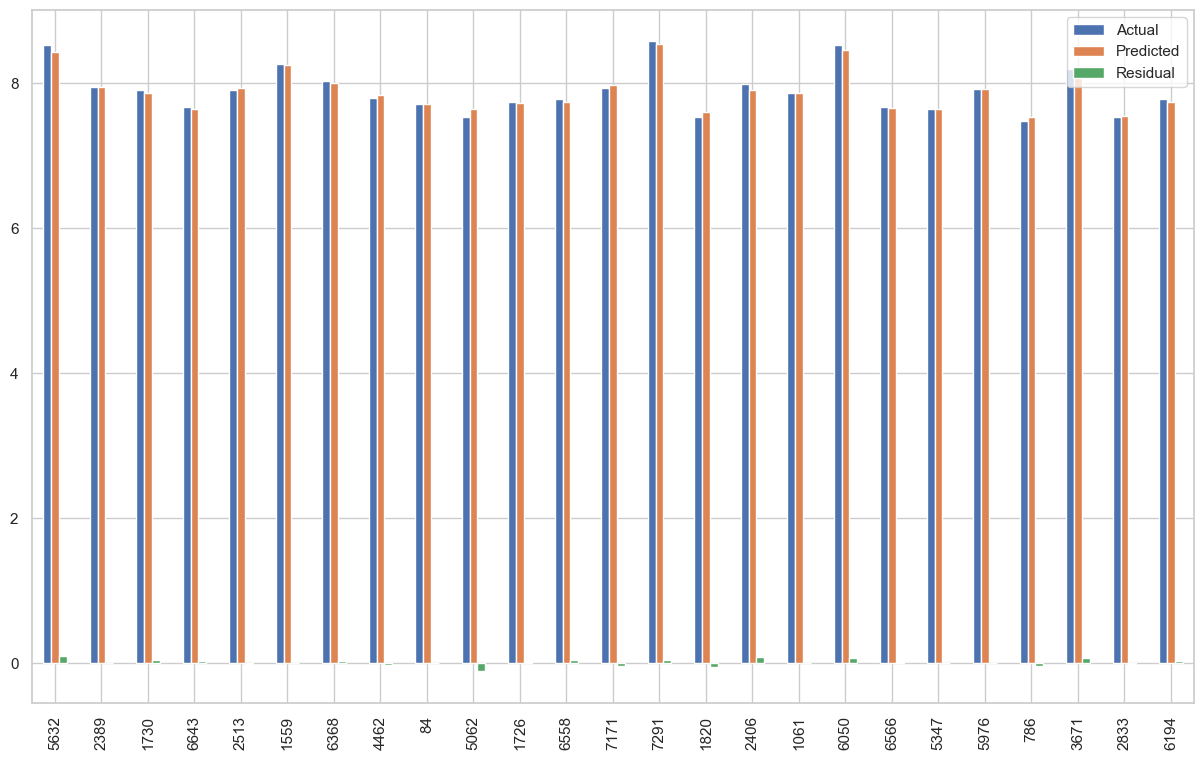

In [55]:
results_df.sample(25).plot(kind="bar", figsize = (15,9))
plt.show()

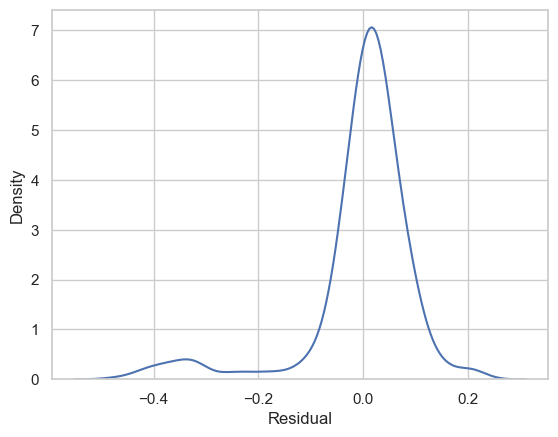

In [58]:
sns.kdeplot(results_df["Residual"])
plt.show()

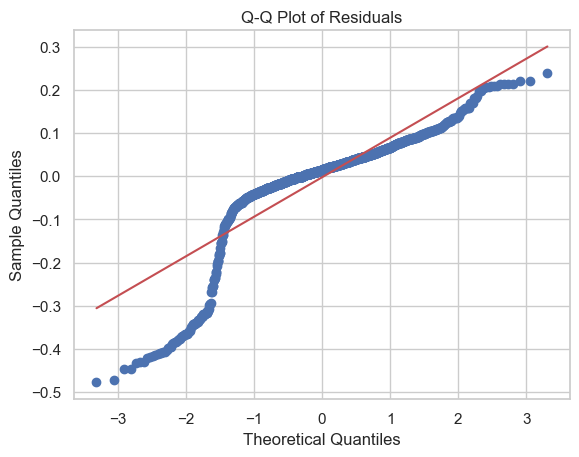

In [62]:
import scipy.stats as stats

# Plot the Q-Q plot
stats.probplot(results_df["Residual"], dist ="norm", plot = plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [65]:
!pip install yellowbrick

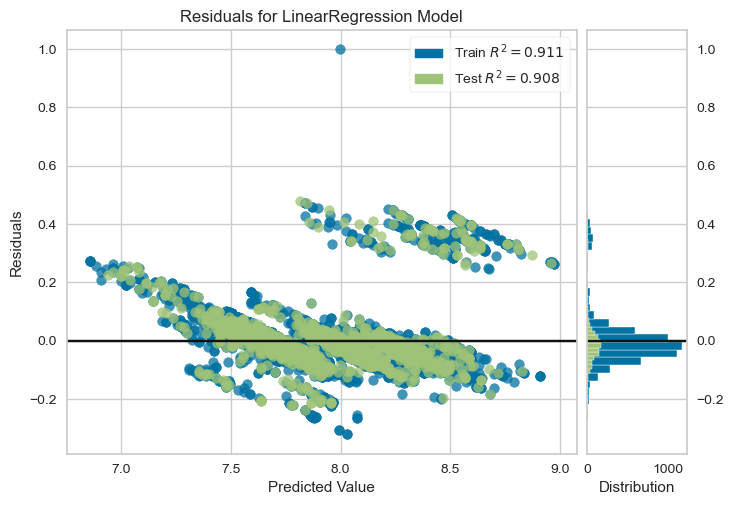

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [68]:
from yellowbrick.regressor import ResidualsPlot

# Initialize the visualizer with the MLR model
visualizer = ResidualsPlot(model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Finalize and render the figure
visualizer.show()

Let's conduct hyperparameter tuning to evaluate whether it improves the model fitting. In linear regression, we have two regularization techniques: 

Ridge regression

Lasso regression

We will apply each of them separately to assess their impact on the model performance.

Lasso Regression

In [71]:
# Step 6: Fit a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed
lasso_model.fit(X_train, y_train)

# Evaluate the Lasso model
lasso_train_score = lasso_model.score(X_train, y_train)
lasso_test_score = lasso_model.score(X_test, y_test)

print("Lasso Training R^2 Score:", lasso_train_score)
print("Lasso Testing R^2 Score:", lasso_test_score)

Lasso Training R^2 Score: 0.0
Lasso Testing R^2 Score: -0.0010657095620385526


The training R^2 score of 0.0 indicates that the Lasso regression model explains none of the variance in the training data. This suggests that the Lasso model is not able to capture the relationship between the independent and dependent variables in the training data.

The testing R^2 score of approximately -0.001 suggests that the Lasso regression model performs even worse on the testing data, explaining slightly less than 0% of the variance. A negative R^2 score indicates that the model is performing worse than a horizontal line fitting the data, essentially providing no predictive power.

These results indicate that the Lasso regression model is not suitable for dataset. 

Ridge Regression

In [72]:
from sklearn.linear_model import Ridge, Lasso

# Step 5: Fit a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge_model.fit(X_train, y_train)

# Evaluate the Ridge model
ridge_train_score = ridge_model.score(X_train, y_train)
ridge_test_score = ridge_model.score(X_test, y_test)

print("Ridge Training R^2 Score:", ridge_train_score)
print("Ridge Testing R^2 Score:", ridge_test_score)

Ridge Training R^2 Score: 0.9110462015627051
Ridge Testing R^2 Score: 0.9078143172355687



Linear Regression:

Training R^2 Score: 0.9110462502540878
Testing R^2 Score: 0.9078127033934025

Ridge Regression:

Training R^2 Score: 0.9110462015627051
Testing R^2 Score: 0.9078143172355687

The very slight difference in R^2 scores between the linear regression and Ridge regression models suggests that the regularization introduced by the Ridge regression did not lead to significant improvements in performance for this dataset. However, the Ridge regression model might still offer benefits such as increased robustness to multicollinearity or improved generalization to unseen data in other scenarios or datasets.